# oceanarray demo - preparation

This notebook walks through the instrument-level processing.


In [1]:
from pathlib import Path
import numpy as np
import gsw
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from oceanarray import readers, plotters, tools, convertOS, writers, mooring
from oceanarray import rapid_interp


## Stack instruments on a mooring

In [2]:
data_dir = Path("..", "data")
files = list(data_dir.glob("OS_wb2_9_201114_P.nc"))
print(files)
ds_stack = xr.open_dataset(files[0])

#ds_list_OS = readers.load_dataset(files)

#ds_stack = mooring.combine_mooring_OS(ds_list_OS)
#ds_stack

[]


IndexError: list index out of range

## Step 1: Grid in time

In this case, we are filtering with a 2-day 6th order Butterworth filter, then linearly interpolating onto a regular 12-hour grid.

In [3]:
ds_filt = mooring.filter_all_time_vars(ds_stack)
ds_12h = mooring.interp_to_12hour_grid(ds_filt)
ds_12h

NameError: name 'ds_stack' is not defined

In [4]:
# Plot the temperature time series by depth
plotters.plot_timeseries_by_depth(ds_12h, var="CNDC")

NameError: name 'ds_12h' is not defined

plotters.plot_timeseries_by_depth(ds_12h, var="PRES")

## Step 2: Grid vertically

(<Figure size 1200x300 with 2 Axes>,
 <Axes: title={'center': 'Monthly dSdp Climatology'}, xlabel='Temperature (°C)', ylabel='dSdp (per dbar)'>)

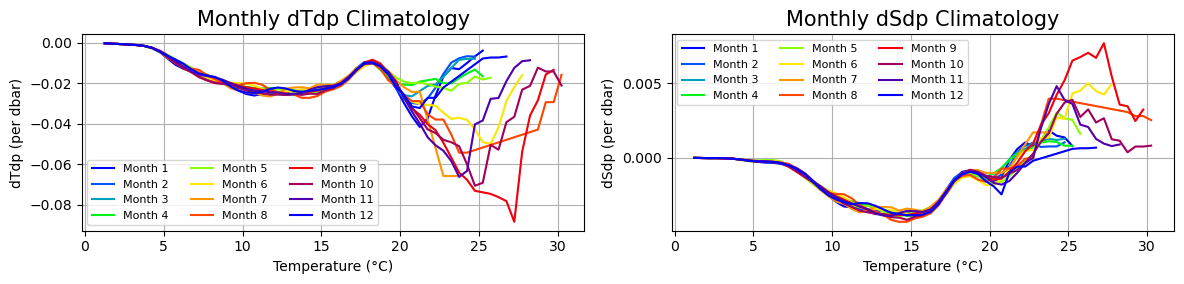

In [5]:
clim_path = Path("../data/climatology_WB2.nc")
ds_clim = xr.open_dataset(clim_path)
# plot the climatology
# Plot the climatology
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
plotters.plot_climatology(ds_clim, clim_ds_smoothed=ds_clim,var="dTdp", fig=fig, ax=ax[0])
plotters.plot_climatology(ds_clim, clim_ds_smoothed=ds_clim, var="dSdp", fig=fig, ax=ax[1])

In [6]:
# The climatology is in SA and CT, so we need to convert our data
# Maybe for similarity with RAPID, we shoudl convert the climatology to T and S
ds_clim

<xarray.Dataset> Size: 15kB
Dimensions:  (month: 12, TEMP: 74)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * TEMP     (TEMP) float64 592B -1.75 -1.25 -0.75 -0.25 ... 33.75 34.25 34.75
Data variables:
    dTdp     (month, TEMP) float64 7kB ...
    dSdp     (month, TEMP) float64 7kB ...
Attributes:
    method:          seasonal climatology built from downsampled CTD profiles
    temp_bin_width:  0.5
    description:     Monthly climatology of dT/dP and dS/dP vs temperature.
    generated_by:    verticalnn rapid_interp module
    created_on:      2025-06-09T17:45:03

In [7]:
pmax = float(ds_12h.PRES.max())
print("Maximum pressure in ds_interp:", pmax)

pmax = max(ds_12h.PRES.max(), 3900)
print("Maximum pressure after adjustment:", pmax)

pgrid = rapid_interp.spacing(0, pmax, 20)

SP = gsw.SP_from_C(ds_12h["CNDC"], ds_12h["TEMP"], ds_12h["PRES"])
SA = gsw.SA_from_SP(SP, ds_12h["PRES"], ds_12h["LONGITUDE"], ds_12h["LATITUDE"])
CT = gsw.CT_from_t(SA, ds_12h["TEMP"], ds_12h["PRES"])
ds_12h = ds_12h.assign(SP=(("TIME", "DEPTH", "LATITUDE", "LONGITUDE"), SP.data),
    SA=(("TIME", "DEPTH", "LATITUDE", "LONGITUDE"), SA.data),
    CT=(("TIME", "DEPTH", "LATITUDE", "LONGITUDE"), CT.data))
lat = float(ds_12h["LATITUDE"].values)
lon = float(ds_12h["LONGITUDE"].values)

ds_12h = ds_12h.squeeze(dim=["LATITUDE", "LONGITUDE"], drop=True)
ds_12h = ds_12h.assign_coords(LATITUDE=("TIME", [lat] * ds_12h.dims["TIME"]))
ds_12h = ds_12h.assign_coords(LONGITUDE=("TIME", [lon] * ds_12h.dims["TIME"]))

ds_interp = rapid_interp.interpolate_profiles(ds_12h, ds_clim, time_key="TIME", p_grid=pgrid)
ds_12h


NameError: name 'ds_12h' is not defined

In [8]:
ds_interp

NameError: name 'ds_interp' is not defined

In [9]:


plotters.plot_timeseries_by_depth(ds_12h, var="PRES")
plotters.pcolor_timeseries_by_depth(ds_interp, var="SA")

NameError: name 'ds_12h' is not defined

In [10]:
# Check the profiles
plotters.scatter_profile_vs_PRES(ds_interp, ds_12h, var="SA")

NameError: name 'ds_interp' is not defined